# Project: Approximate the sine in six ways.  

Find a cubic polynomial $u$ that best approximates $\sin(t)$ in the sense that $\|u(t)-\sin(t)\|$ is minimized.  The definition of the norm $\| \qquad \|$, however, depends on a choice of inner product.  Here are six different ways to define inner products on the vector space of polynomials of degree less than or equal to $3$.

\begin{align*}
\langle f,g\rangle_6&=f(3)g(3)+f'(3)g'(3)+f''(3)g''(3)+f'''(3)g'''(3)\\
 \langle f,g\rangle_5&=\int_0^6 f(t)g(t)dt \\
 \langle f,g\rangle_3&=f(0)g(0)+f(2)g(2)+f(4)g(4)+f(6)g(6)\\
\langle f,g\rangle_2&=f(1)g(1)+f'(1)g'(1)+f(5)g(5)+f'(5)g'(5)\\
 \langle f,g\rangle_4&=f(0)g(0)+f(3)g(3)+f'(3)g'(3)+f(6)g(6)\\
 \langle f,g\rangle_1&=f(0)g(0)+f'(0)g'(0)+f(6)g(6)+f'(6)g'(6)
\end{align*}


In [1]:
import scipy.integrate as integ
from sympy import *
import math

In [4]:
import numpy as np

In [5]:
x = Symbol('x')

$$ \langle f,g\rangle_1 =f(0)g(0)+f'(0)g'(0)+f(6)g(6)+f'(6)g'(6) $$ 

In [6]:
def ip1(f,g):

    h = f*g
    diffF = lambdify(x,diff(f))
    diffG = lambdify(x,diff(g))

    return (N(h.subs(x,0)) + diffF(0)*diffG(0) + N(h.subs(x,6)) + diffF(6)*diffG(6))

$$ \langle f,g\rangle_2=f(1)g(1)+f'(1)g'(1)+f(5)g(5)+f'(5)g'(5)$$

In [7]:
def ip2(f,g):

    h = f*g
    diffF = lambdify(x,diff(f))
    diffG = lambdify(x,diff(g))

    return (N(h.subs(x,1)) + (diffF(1)*diffG(1)) + N(h.subs(x,5)) + (diffF(5)*diffG(5)))

$$ \langle f,g\rangle_3=f(0)g(0)+f(2)g(2)+f(4)g(4)+f(6)g(6) $$ 

In [8]:
def ip3(f,g):

    h = f*g
    diffF = lambdify(x,diff(f))
    diffG = lambdify(x,diff(g))

    return (N(h.subs(x,0)) + diffF(2)*diffG(2) + N(h.subs(x,4)) + N(h.subs(x,6)))

 $$ \langle f,g\rangle_4=f(0)g(0)+f(3)g(3)+f'(3)g'(3)+f(6)g(6)$$

In [9]:
def ip4(f,g):
    
    h = f*g
    diffF = lambdify(x,diff(f))
    diffG = lambdify(x,diff(g))
    
    return (N(h.subs(x,0)) + (N(h.subs(x,3))) + (diffF(3)*diffG(3)) + (N(h.subs(x,6))))

$$ \langle f,g\rangle_5=\int_0^6 f(t)g(t)dt $$


In [10]:
def ip5(f,g):

    h = f*g
    
    return integ.quad(lambda t: h.subs(x,t),0,6)[0]

$$ \langle f,g\rangle_6=f(3)g(3)+f'(3)g'(3)+f''(3)g''(3)+f'''(3)g'''(3)$$

In [11]:
def ip6(f,g):
    
    h = f*g
    diffF = lambdify(x,diff(f))
    diffFTwo = lambdify(x,diff(f,x,x))
    diffFThree = lambdify(x,diff(f,x,x,x))
    diffG = lambdify(x,diff(g))
    diffGTwo = lambdify(x,diff(g,x,x))
    diffGThree = lambdify(x,diff(g,x,x,x))
    
    return (N(h.subs(x,3)) + (diffF(3)*diffG(3)) + (diffFTwo(3)*diffGTwo(3)) + (diffFThree(3)*diffGThree(3)))

In [13]:
k=3 # max degree
myEOne=[] # initialize the output with zeros, for ip1
myETwo=[] # for ip2
myEThree=[] #for ip3
myEFour=[] #for ip4
myEFive=[] #for ip5
myESix=[] #for ip6


for i in range(k+1):
    alpha = x**i
    beta = x**i
    gamma = x**i
    delta = x**i
    epsilon = x**i
    zeta = x**i
    for j in range(i):
        alpha+=-ip1(myEOne[j],x**i)*myEOne[j]
        beta+=-ip2(myETwo[j],x**i)*myETwo[j]
        gamma+=-ip3(myEThree[j],x**i)*myEThree[j]
        delta+=-ip4(myEFour[j],x**i)*myEFour[j]
        epsilon+=-ip5(myEFive[j],x**i)*myEFive[j]
        zeta+=-ip6(myESix[j],x**i)*myESix[j]
        
    myEOne.append(alpha/(sqrt(ip1(alpha,alpha))))
    myETwo.append(beta/(sqrt(ip2(beta,beta))))
    myEThree.append(gamma/(sqrt(ip3(gamma,gamma))))
    myEFour.append(delta/(sqrt(ip4(delta,delta))))
    myEFive.append(epsilon/(sqrt(ip5(epsilon,epsilon))))
    myESix.append(zeta/(sqrt(ip6(zeta,zeta))))


In [14]:
u1=0.0
u2=0.0
u3=0.0
u4=0.0
u5=0.0
u6=0.0

for p in myEOne:
    u1+= ip1(sin(x),p) * p
for q in myETwo:
    u2+= ip2(sin(x),q) * q
for r in myEThree:
    u3+= ip3(sin(x),r) * r
for s in myEFour:
    u4+= ip4(sin(x),s) * s
for t in myEFive:
    u5+= ip5(sin(x),t) * t
for v in myESix:
    u6+= ip6(sin(x),v) * v
print(u1)
print(u2)
print(u3)
print(u4)
print(u5)
print(u6)

0.0570363551680554*x**3 - 0.516646339291636*x**2 + 0.999999999999996*x - 6.66133814775094e-16
0.107760132566681*x**3 - 1.00192120815074*x**2 + 2.22086432446957*x - 0.48523226407762
0.0567365531800259*x**3 - 0.49604984473668*x**2 + 0.887213904239324*x + 1.0623446566882e-14
0.104824805211183*x**3 - 0.974626331029463*x**2 + 2.02749574887437*x - 1.22124532708767e-15
0.0975657436612037*x**3 - 0.913211464612763*x**2 + 1.97592056204524*x - 0.231135982929297
0.164998749433408*x**3 - 1.5555487489306*x**2 + 3.88833376228116*x - 1.9789087731102


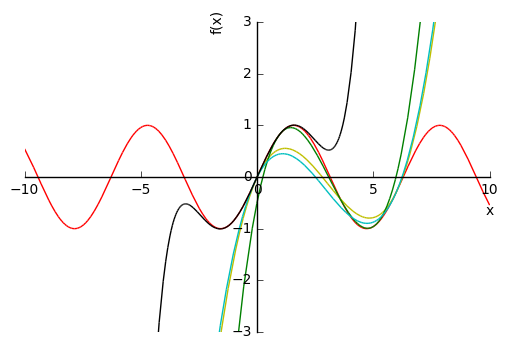

In [15]:
myPlot = plot(sin(x), u1,u2,u3, x-x**3 /6.+x**5 / 120.0, (x,-10,10), ylim=[-3,3], show=False)
myPlot[0].line_color = 'r' #sin(x)
myPlot[1].line_color = 'y' #from ip1
myPlot[2].line_color = 'g' #from ip2
myPlot[3].line_color = 'c' #from ip3
myPlot[4].line_color = 'k' #from taylor series
myPlot.show()

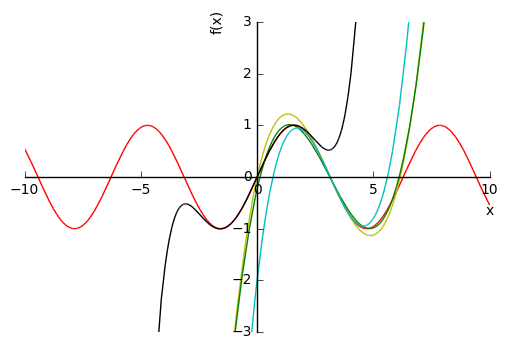

In [16]:
myPlot2 = plot(sin(x), u4,u5,u6,x-x**3 /6.+x**5 / 120.0,(x,-10,10), ylim=[-3,3], show=False)
myPlot2[0].line_color = 'r' #sin(x)
myPlot2[1].line_color = 'y' #from ip4
myPlot2[2].line_color = 'g' #from ip5
myPlot2[3].line_color = 'c' #from ip6
myPlot2[4].line_color = 'k' #from taylor series
myPlot2.show()

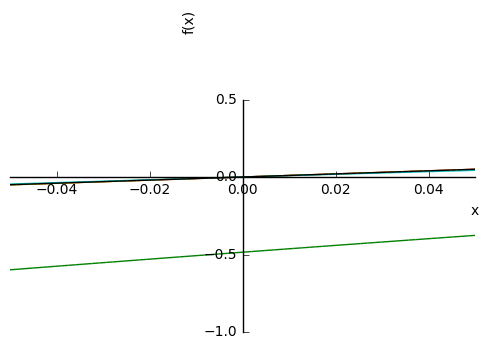

In [17]:
myplot = plot(sin(x), u1,u2,u3,x-x**3 /6.+x**5 / 120.0, (x,-0.05,0.05), ylim=[-1,1], show=False) #fine tune scale to show discrepancies 
myplot[0].line_color = 'r' #sin(x)
myplot[1].line_color = 'y' #from ip1
myplot[2].line_color = 'g' #from ip2
myplot[3].line_color = 'c' #from ip3
myplot[4].line_color = 'k' #from taylor series
myplot.show()